In [1]:
import dropbox
import datetime
import schedule
import numpy as np
import string
import requests

from threading import Timer
import time
import sys
import os

import csv
import sqlite3


import math
import random
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.dates as mdate

from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter


import codecs

Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...


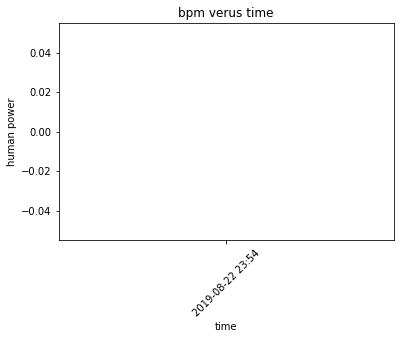

Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...


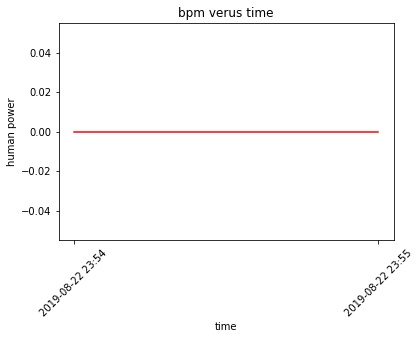

Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...


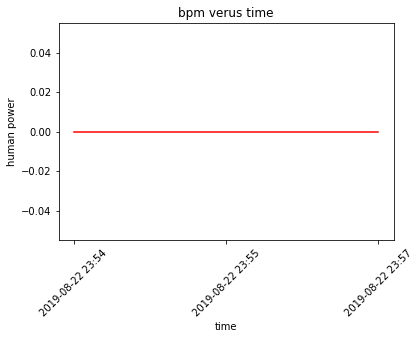

Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...


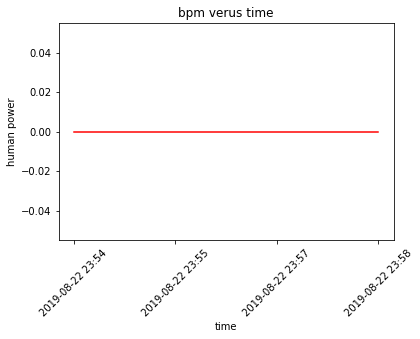

Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...


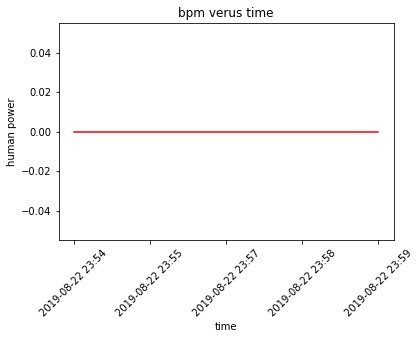

Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...


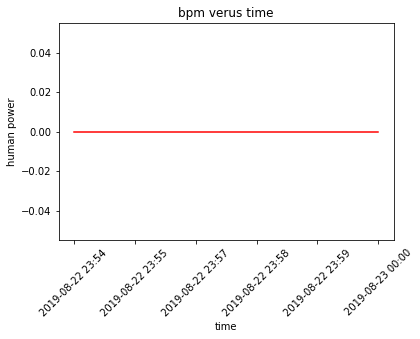

Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...


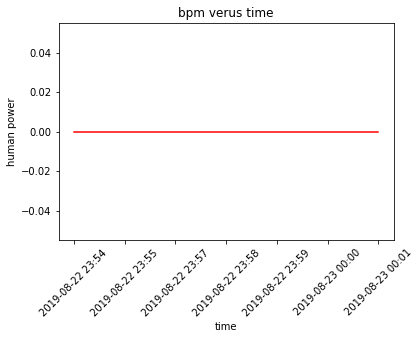

Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...


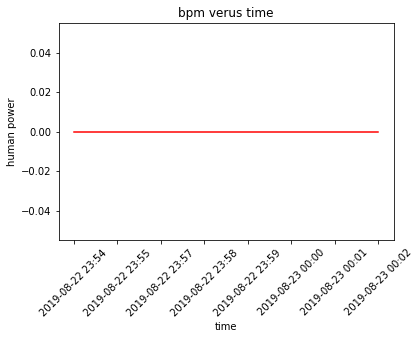

Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...


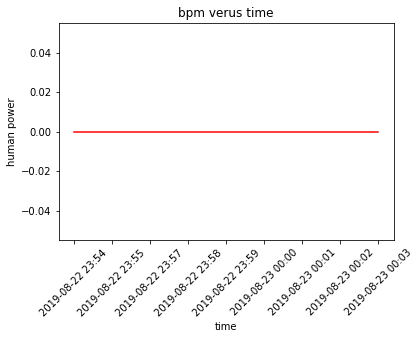

Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...


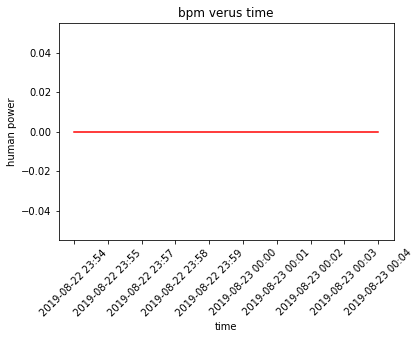

Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...


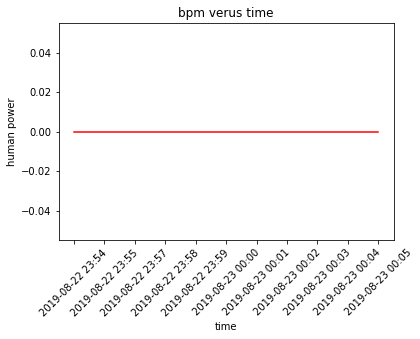

KeyboardInterrupt: 

In [26]:
class EBikeData_Getting:
        
    def EBike(x_t,y_hP):
        # Dropbox access token    
        dbx = dropbox.Dropbox('lY_d3DAmzgAAAAAAAAAAs2SoAOwHmVVqP5ozJcw4sDBPvIdzSSwISAjUuy1eDLt4')

        # Set parameters for downloading the file 
        # Saving path
        save_path = 'C:\\FINAL_PROJECT\\EBike_Files\\Data.db'
        # File location in dropbox    
        path = '/EBIKE.db'

         # current time
        timestamp = datetime.datetime.now()
        # time gap
        delta = datetime.timedelta(minutes = 1)
        # time where the IBI file has been bulit
        filetime = timestamp - delta

        # Re-formatting: datetime->String
        timeframe = filetime.strftime('%Y-%m-%d %H:%M')
        csv_filetime = filetime.strftime('%Y-%m-%d-%H-%M')
        #res = dbx.files_list_folder(path,None)
        #print (res)
        # try download
        try:
            dbx.files_download_to_file(save_path,path,None)   
        except:
                print('Database current is not exsit')
                pass
        else:
            print("Successful Downloading database file from Dropbox, overwriting " + save_path + "...")

            # Save voltage of the motor and data which averaged
            conn = sqlite3.connect(save_path)
            cursor = conn.cursor()

            #timeframe = '2019-07-19 19:28'
            try:
                res_findData=cursor.execute("SELECT * FROM bikeData WHERE time LIKE '%%%s%%'" %timeframe) # find "key words" in column time of table bikeData
            except:
                print('try dump')
                conn.close()
                time.sleep(10)
                dbx.files_download_to_file(save_path,path,None)
                print('redownload')
                conn = sqlite3.connect(save_path)
                cursor = conn.cursor()

            if cursor.fetchone() is None:   # No corresponding data to the time, need Optimize
                count = 0
                print('Not Found')
                pass
            else:                   # Have such data
                rows = cursor.fetchall()

                sum_hP = 0
                sum_ThrOut = 0
                count = 0

                for row in rows:
                    sum_hP += row[9]
                    sum_ThrOut += row[12]
                    count += 1

            conn.close()

            if count == 0:
                pass

            else:
                ave_hP = sum_hP/count
                d5_hP = int(ave_hP/5)
                ave_ThrOut = sum_ThrOut/count
                d5_ThrOut = int(ave_ThrOut/5)
                # export the data processed into file "export_EBikedata.csv"

                x_t.append(timeframe)
                y_hP.append(ave_hP)

                fig = EBikeData_Getting.draw(x_t, y_hP)

                with open("export_EBikedata.csv", "a", newline='') as f:
                    headers = ['time', 'average humanPower', 'D5 humanPower','average ThrottleOutput','D5 ThrottleOutput' ]
                    writer = csv.writer(f)

                    if not os.path.getsize("export_EBikedata.csv"):         
                        # print('no headers')
                        writer.writerow(headers) # file doesn't exist yet, write a header

                    # print('have headers')
                    writer.writerow([csv_filetime,ave_hP,d5_hP,ave_ThrOut,d5_ThrOut])
                    # Remove duplicates
                    # pd.read_csv("export_EBikedata.csv").drop_duplicates(subset ="First Name",keep = False, inplace = True)
                    f.close()
                
    def StartEBike():
        x_t = []
        y_hP = []
        schedule.every(1).minutes.do(EBikeData_Getting.EBike,x_t,y_hP)
        while True:
            schedule.run_pending()
            
    def draw(x_t, y_hP):
        plt.clf()
        plt.plot(x_t, y_hP, '-r')
        plt.tick_params(axis='x', rotation=45)
        plt.title('bpm verus time')
        plt.xlabel('time')
        plt.ylabel('human power')
        plt.pause(0.01)  # pause a bit so that plots are updated
            
if __name__ == "__main__":
    schedule.clear()
    EBikeData_Getting.StartEBike()
    print ('here')


In [6]:
#View the tables inside the Data.db
conn = sqlite3.connect( 'C:\\FINAL_PROJECT\\EBike_Files\\Data.db')
cursor = conn.cursor()
sql = """select name from sqlite_master where type='table' order by name"""
cursor.execute(sql)
result = cursor.fetchall()
print (result)
conn.close()

[('android_metadata',), ('bikeData',), ('bikeLocation',), ('breathingControl',), ('caloriesControl',), ('commandSent',), ('cooperativeBreathingControl',), ('heartRate',), ('mBandCaloriesBurned',), ('mTarget',), ('motorFilter',), ('sqlite_sequence',), ('trafficLight',)]


In [7]:
# headers of tables in .db file
conn = sqlite3.connect( 'C:\\FINAL_PROJECT\\EBike_Files\\Data.db')
cursor = conn.cursor()
sql = """pragma table_info(bikeData)"""
cursor.execute(sql)
result = cursor.fetchall()
print (result)
conn.close()

[(0, '_id', 'INTEGER', 0, None, 1), (1, 'time', 'TIMESTAMP', 0, 'CURRENT_TIMESTAMP', 0), (2, 'batteryEnergy', 'FLOAT', 0, None, 0), (3, 'voltage', 'FLOAT', 0, None, 0), (4, 'current', 'FLOAT', 0, None, 0), (5, 'speed', 'FLOAT', 0, None, 0), (6, 'distance', 'FLOAT', 0, None, 0), (7, 'temperature', 'FLOAT', 0, None, 0), (8, 'RPM', 'FLOAT', 0, None, 0), (9, 'humanPower', 'FLOAT', 0, None, 0), (10, 'torque', 'FLOAT', 0, None, 0), (11, 'throttleIn', 'FLOAT', 0, None, 0), (12, 'throttleOut', 'FLOAT', 0, None, 0), (13, 'acceleration', 'FLOAT', 0, None, 0), (14, 'flag', 'STRING', 0, None, 0)]


In [15]:
# Save voltage of the motor and data which averaged
conn = sqlite3.connect( 'C:\\FINAL_PROJECT\\EBike_Files\\Data.db')
cursor = conn.cursor()

timeframe = '2019-08-23 00:21'

timestamp = datetime.datetime.now()
# time gap
delta = datetime.timedelta(minutes = 1)
# time where the IBI file has been bulit
filetime = timestamp - delta

# Re-formatting: datetime->String
timeframe = filetime.strftime('%Y-%m-%d %H:%M')


res_findData=cursor.execute("SELECT * FROM bikeData WHERE time LIKE '%%%s%%'" %timeframe) # find "key words" in column time of table bikeData

if cursor.fetchone() is None:   # No corresponding data to the time, need Optimize
    print('Not Found')
    count = 0
    pass
else:                   # Have such data
    rows = cursor.fetchall()
    
    sum_hP = 0
    sum_ThrOut = 0
    count = 0
        
    for row in rows:
        sum_hP += row[9]
        sum_ThrOut += row[12]
        count += 1
        
conn.close()

if count == 0:
    pass
else:
    ave_hP = sum_hP/count
    d5_hP = int(ave_hP/5)
    ave_ThrOut = sum_ThrOut/count
    d5_ThrOut = int(ave_ThrOut/5)

    # export the data processed into file "export_EBikedata.csv"

    with open("export_EBikedata.csv", "a", newline='') as f:
        headers = ['time', 'average_humanPower','d5_humanPower', 'average_ThrottleOutput' , 'd5_ThrottleOutput']
        writer = csv.writer(f)

        if not os.path.getsize("export_EBikedata.csv"):         
            # print('no headers')
            writer.writerow(headers) # file doesn't exist yet, write a header
        # print('have headers')
        writer.writerow([timeframe,ave_hP,d5_hP,ave_ThrOut,d5_ThrOut])
        # Remove duplicates
        # pd.read_csv("export_EBikedata.csv").drop_duplicates(subset ="First Name",keep = False, inplace = True)
        f.close()



12


In [9]:
    def EBike(x_t,y_hP):
        timestamp = datetime.datetime.now()
        # time gap
        delta = datetime.timedelta(minutes = 4)
        # time where the IBI file has been bulit
        filetime = timestamp - delta

        # Re-formatting: datetime->String
        timeframe = filetime.strftime('%Y-%m-%d %H:%M')
        print(timeframe)

2019-08-20 14:20


In [5]:
        dbx = dropbox.Dropbox('lY_d3DAmzgAAAAAAAAAAs2SoAOwHmVVqP5ozJcw4sDBPvIdzSSwISAjUuy1eDLt4')

        # Set parameters for downloading the file 
        # Saving path
        save_path = 'C:\\FINAL_PROJECT\\EBike_Files\\Data.db'
        # File location in dropbox    
        path = '/EBIKE.db'
        #res = dbx.files_list_folder(path,None)
        #print (res)
        # try download
        dbx.files_download_to_file(save_path,path,None)   

FileMetadata(name='EBike.db', id='id:HDe7egdlNmAAAAAAAAALzA', client_modified=datetime.datetime(2019, 8, 22, 23, 23, 7), server_modified=datetime.datetime(2019, 8, 22, 23, 23, 7), rev='01590bcf8ead9e1000000016b5ec0a0', size=192512, path_lower='/ebike.db', path_display='/EBike.db', parent_shared_folder_id=None, media_info=None, symlink_info=None, sharing_info=None, property_groups=None, has_explicit_shared_members=None, content_hash='fa12ed6207c86767fea524b2d01af8c6fcbbbf005ee657035736433322b95a5b')

In [23]:
def EBike2(x_t,y_hP):
    # Dropbox access token    
    dbx = dropbox.Dropbox('lY_d3DAmzgAAAAAAAAAAs2SoAOwHmVVqP5ozJcw4sDBPvIdzSSwISAjUuy1eDLt4')

    # Set parameters for downloading the file 
    # Saving path
    save_path = 'C:\\FINAL_PROJECT\\EBike_Files\\Data.db'
    # File location in dropbox    
    path = '/EBIKE.db'

     # current time
    timestamp = datetime.datetime.now()
    # time gap
    delta = datetime.timedelta(minutes = 1)
    # time where the IBI file has been bulit
    filetime = timestamp - delta

    # Re-formatting: datetime->String
    timeframe = filetime.strftime('%Y-%m-%d %H:%M')
    #res = dbx.files_list_folder(path,None)
    #print (res)
    # try download
    try:
        dbx.files_download_to_file(save_path,path,None)   
    except:
            print('Database current is not exsit')
            pass
    else:
        print("Successful Downloading database file from Dropbox, overwriting " + save_path + "...")

        # Save voltage of the motor and data which averaged
        conn = sqlite3.connect(save_path)
        cursor = conn.cursor()

        #timeframe = '2019-07-19 19:28'
        try:
            res_findData=cursor.execute("SELECT * FROM bikeData WHERE time LIKE '%%%s%%'" %timeframe) # find "key words" in column time of table bikeData
        except:
            print('try dump')
            conn.close()
            time.sleep(10)
            dbx.files_download_to_file(save_path,path,None)
            print('redownload')
            conn = sqlite3.connect(save_path)
            cursor = conn.cursor()
        
        if cursor.fetchone() is None:   # No corresponding data to the time, need Optimize
            count = 0
            print('Not Found')
            pass
        else:                   # Have such data
            rows = cursor.fetchall()

            sum_hP = 0
            sum_ThrOut = 0
            count = 0

            for row in rows:
                sum_hP += row[9]
                sum_ThrOut += row[12]
                count += 1

        conn.close()

        if count == 0:
            pass

        else:
            ave_hP = sum_hP/count
            d5_hP = int(ave_hP/5)
            ave_ThrOut = sum_ThrOut/count
            d5_ThrOut = int(ave_ThrOut/5)
            # export the data processed into file "export_EBikedata.csv"

            x_t.append(timeframe)
            y_hP.append(ave_hP)

            fig = EBikeData_Getting.draw(x_t, y_hP)

            with open("export_EBikedata.csv", "a", newline='') as f:
                headers = ['time', 'average humanPower', 'D5 humanPower','average ThrottleOutput','D5 ThrottleOutput' ]
                writer = csv.writer(f)

                if not os.path.getsize("export_EBikedata.csv"):         
                    # print('no headers')
                    writer.writerow(headers) # file doesn't exist yet, write a header

                # print('have headers')
                writer.writerow([timeframe,ave_hP,d5_hP,ave_ThrOut,d5_ThrOut])
                # Remove duplicates
                # pd.read_csv("export_EBikedata.csv").drop_duplicates(subset ="First Name",keep = False, inplace = True)
                f.close()
                
if __name__ == "__main__":
    schedule.clear()
    x_t = []
    y_hP = []
    schedule.every(1).minutes.do(EBike2,x_t,y_hP)
    while True:
        schedule.run_pending()
    print ('here')

Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data

Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data.db...
Not Found
Successful Downloading database file from Dropbox, overwriting C:\FINAL_PROJECT\EBike_Files\Data

KeyboardInterrupt: 